# Imports

In [1]:
import pandas as pd
import numpy as np
#import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor

# metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Data

In [2]:
# Using Stage 2 because it contains 2021 data

df_massey = pd.read_csv("Data/2021/MDataFiles_Stage2/MMasseyOrdinals.csv")
df_tourney_results = pd.read_csv("Data/2021/MDataFiles_Stage2/MNCAATourneyDetailedResults.csv")
df_season_results = pd.read_csv("Data/2021/MDataFiles_Stage2/MRegularSeasonDetailedResults.csv")
df_teams = pd.read_csv("Data/2021/MDataFiles_Stage2/MTeams.csv")
df_kenPom = pd.read_csv("Data/2021/kenPom_Full.csv")

df_tourney_results.tail()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
1110,2019,146,1120,77,1246,71,N,1,26,65,...,21,12,21,11,30,14,14,5,5,19
1111,2019,146,1277,68,1181,67,N,0,30,70,...,21,8,13,13,29,14,17,4,9,9
1112,2019,152,1403,61,1277,51,N,0,22,51,...,24,14,18,8,28,6,11,1,2,15
1113,2019,152,1438,63,1120,62,N,0,25,51,...,31,11,14,9,24,9,5,3,3,12
1114,2019,154,1438,85,1403,77,N,1,27,59,...,30,13,15,9,23,9,8,6,3,18


In [3]:
df_teams

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2021
1,1102,Air Force,1985,2021
2,1103,Akron,1985,2021
3,1104,Alabama,1985,2021
4,1105,Alabama A&M,2000,2021
...,...,...,...,...
366,1467,Merrimack,2020,2021
367,1468,Bellarmine,2021,2021
368,1469,Dixie St,2021,2021
369,1470,Tarleton St,2021,2021


In [4]:
len(df_teams)

371

# Data Exploration

In [5]:
df_massey.tail()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
4339985,2021,133,WOB,1467,233
4339986,2021,133,WOB,1468,176
4339987,2021,133,WOB,1469,290
4339988,2021,133,WOB,1470,256
4339989,2021,133,WOB,1471,234


In [6]:
df_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96687 entries, 0 to 96686
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   96687 non-null  int64 
 1   DayNum   96687 non-null  int64 
 2   WTeamID  96687 non-null  int64 
 3   WScore   96687 non-null  int64 
 4   LTeamID  96687 non-null  int64 
 5   LScore   96687 non-null  int64 
 6   WLoc     96687 non-null  object
 7   NumOT    96687 non-null  int64 
 8   WFGM     96687 non-null  int64 
 9   WFGA     96687 non-null  int64 
 10  WFGM3    96687 non-null  int64 
 11  WFGA3    96687 non-null  int64 
 12  WFTM     96687 non-null  int64 
 13  WFTA     96687 non-null  int64 
 14  WOR      96687 non-null  int64 
 15  WDR      96687 non-null  int64 
 16  WAst     96687 non-null  int64 
 17  WTO      96687 non-null  int64 
 18  WStl     96687 non-null  int64 
 19  WBlk     96687 non-null  int64 
 20  WPF      96687 non-null  int64 
 21  LFGM     96687 non-null  int64 
 22

In [7]:
# Narrow to 2021 Season

df_2021 = df_season_results.loc[df_season_results.Season == 2021].reset_index(drop=True)
df_massey_2021 = df_massey.loc[df_massey.Season == 2021].reset_index(drop=True)

df_2021

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2021,23,1101,70,1190,47,N,0,20,49,...,21,14,17,11,27,5,22,6,2,0
1,2021,23,1104,81,1240,57,H,0,30,77,...,32,10,17,18,28,10,20,5,2,0
2,2021,23,1111,81,1354,61,A,0,32,62,...,32,6,11,12,18,12,9,13,0,14
3,2021,23,1113,94,1348,88,N,0,27,61,...,18,21,35,7,26,14,16,8,2,0
4,2021,23,1114,71,1341,66,N,0,22,51,...,21,4,4,7,15,14,24,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,2021,132,1104,80,1261,79,N,0,33,76,...,27,9,13,15,26,10,5,6,5,13
3851,2021,132,1159,85,1259,72,H,0,31,59,...,22,9,16,12,19,12,12,2,1,13
3852,2021,132,1222,91,1153,54,N,0,37,66,...,33,10,15,14,17,11,10,2,5,12
3853,2021,132,1228,91,1326,88,N,1,29,64,...,25,22,30,8,27,11,8,7,4,26


In [8]:
IDs = []
Names = []

for x in range(len(df_teams)):
    ID = df_teams.TeamID[x]
    Name = df_teams.TeamName[x]
    
    IDs.append(ID)
    Names.append(Name)
    
team_zip = zip(IDs, Names)

team_list = []

for TeamID, TeamName in team_zip:
    team_dict = {}
    team_dict['TeamID'] = TeamID
    team_dict['TeamName'] = TeamName
    team_dict['Wins'] = 0
    team_dict['Losses'] = 0
    team_dict['GP'] = 0
    
    team_list.append(team_dict)
    

team_list

[{'TeamID': 1101, 'TeamName': 'Abilene Chr', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1102, 'TeamName': 'Air Force', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1103, 'TeamName': 'Akron', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1104, 'TeamName': 'Alabama', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1105, 'TeamName': 'Alabama A&M', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1106, 'TeamName': 'Alabama St', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1107, 'TeamName': 'SUNY Albany', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1108, 'TeamName': 'Alcorn St', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1109, 'TeamName': 'Alliant Intl', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1110,
  'TeamName': 'American Univ',
  'Wins': 0,
  'Losses': 0,
  'GP': 0},
 {'TeamID': 1111,
  'TeamName': 'Appalachian St',
  'Wins': 0,
  'Losses': 0,
  'GP': 0},
 {'TeamID': 1112, 'TeamName': 'Arizona', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1113, 'TeamName': 'Arizona St', 'Wins

In [9]:
winning_teams = []
losing_teams = []


for index, row in df_2021.iterrows():
    win = row.WTeamID
    loss = row.LTeamID
    for team in team_list:
        if team['TeamID'] == win:
            winning_teams.append(team['TeamName'])
            team['Wins'] += 1
            team['GP'] += 1
        elif team['TeamID'] == loss:
            losing_teams.append(team['TeamName'])
            team['Losses'] += 1
            team['GP'] +=1
        else:
            pass
        
team_list

[{'TeamID': 1101,
  'TeamName': 'Abilene Chr',
  'Wins': 19,
  'Losses': 4,
  'GP': 23},
 {'TeamID': 1102, 'TeamName': 'Air Force', 'Wins': 5, 'Losses': 20, 'GP': 25},
 {'TeamID': 1103, 'TeamName': 'Akron', 'Wins': 13, 'Losses': 8, 'GP': 21},
 {'TeamID': 1104, 'TeamName': 'Alabama', 'Wins': 24, 'Losses': 6, 'GP': 30},
 {'TeamID': 1105, 'TeamName': 'Alabama A&M', 'Wins': 6, 'Losses': 9, 'GP': 15},
 {'TeamID': 1106, 'TeamName': 'Alabama St', 'Wins': 4, 'Losses': 14, 'GP': 18},
 {'TeamID': 1107, 'TeamName': 'SUNY Albany', 'Wins': 7, 'Losses': 9, 'GP': 16},
 {'TeamID': 1108, 'TeamName': 'Alcorn St', 'Wins': 6, 'Losses': 13, 'GP': 19},
 {'TeamID': 1109, 'TeamName': 'Alliant Intl', 'Wins': 0, 'Losses': 0, 'GP': 0},
 {'TeamID': 1110,
  'TeamName': 'American Univ',
  'Wins': 4,
  'Losses': 6,
  'GP': 10},
 {'TeamID': 1111,
  'TeamName': 'Appalachian St',
  'Wins': 13,
  'Losses': 11,
  'GP': 24},
 {'TeamID': 1112, 'TeamName': 'Arizona', 'Wins': 17, 'Losses': 9, 'GP': 26},
 {'TeamID': 1113,
  '

In [10]:
summary_df = pd.DataFrame(team_list)
summary_df.head()

# Need to confirm "System Name" to use
final_massey = df_massey_2021.loc[(df_massey_2021.RankingDayNum == 133) & (df_massey_2021.SystemName == '7OT')]


In [11]:
df_massey_2021.SystemName.unique()

array(['AP', 'BNZ', 'BWE', 'DES', 'DII', 'DOK', 'EBP', 'HAS', 'INC',
       'JNG', 'LEF', 'MAS', 'MOR', 'PGH', 'POM', 'SAG', 'SMS', 'TRK',
       'TRP', 'USA', 'WIL', 'FAS', 'RTP', '7OT', 'BBT', 'CWL', 'DAV',
       'KPK', 'DCI', 'NOL', 'RT', 'SFX', 'SPR', 'SRS', 'TPR', 'DOL',
       'DUN', 'KCX', 'NET', 'COL', 'LOG', 'BIH', 'CBR', 'JJK', 'WLK',
       'KRA', 'SEL', 'WMV', 'WOB', 'ARG', 'PIR', 'EMK', 'FDM', 'LAW',
       'LMC', 'REW', 'RWP'], dtype=object)

In [12]:
rank_df = final_massey.merge(summary_df, how='left', on='TeamID')
rank_df.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank,TeamName,Wins,Losses,GP
0,2021,133,7OT,1101,66,Abilene Chr,19,4,23
1,2021,133,7OT,1102,323,Air Force,5,20,25
2,2021,133,7OT,1103,126,Akron,13,8,21
3,2021,133,7OT,1104,5,Alabama,24,6,30
4,2021,133,7OT,1105,314,Alabama A&M,6,9,15


In [13]:
total_games = []

for index, row in df_2021.iterrows():
    mask = summary_df.loc[summary_df.TeamID == row.WTeamID]
    total_GP = mask.GP.values[0]
    total_games.append(total_GP)
    
len(total_games)
                                 


3855

In [14]:
df_2021["WinningTeam"] = winning_teams
df_2021["LosingTeam"] = losing_teams

df_2021.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WinningTeam,LosingTeam
0,2021,23,1101,70,1190,47,N,0,20,49,...,17,11,27,5,22,6,2,0,Abilene Chr,ETSU
1,2021,23,1104,81,1240,57,H,0,30,77,...,17,18,28,10,20,5,2,0,Alabama,Jacksonville St
2,2021,23,1111,81,1354,61,A,0,32,62,...,11,12,18,12,9,13,0,14,Appalachian St,S Carolina St
3,2021,23,1113,94,1348,88,N,0,27,61,...,35,7,26,14,16,8,2,0,Arizona St,Rhode Island
4,2021,23,1114,71,1341,66,N,0,22,51,...,4,7,15,14,24,12,1,0,Ark Little Rock,Prairie View


In [15]:
df_2021_sub = df_2021
df_2021_sub['WTGP'] = total_games

df_2021_sub

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WinningTeam,LosingTeam,WTGP
0,2021,23,1101,70,1190,47,N,0,20,49,...,11,27,5,22,6,2,0,Abilene Chr,ETSU,23
1,2021,23,1104,81,1240,57,H,0,30,77,...,18,28,10,20,5,2,0,Alabama,Jacksonville St,30
2,2021,23,1111,81,1354,61,A,0,32,62,...,12,18,12,9,13,0,14,Appalachian St,S Carolina St,24
3,2021,23,1113,94,1348,88,N,0,27,61,...,7,26,14,16,8,2,0,Arizona St,Rhode Island,25
4,2021,23,1114,71,1341,66,N,0,22,51,...,7,15,14,24,12,1,0,Ark Little Rock,Prairie View,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,2021,132,1104,80,1261,79,N,0,33,76,...,15,26,10,5,6,5,13,Alabama,LSU,30
3851,2021,132,1159,85,1259,72,H,0,31,59,...,12,19,12,12,2,1,13,Colgate,Loyola MD,15
3852,2021,132,1222,91,1153,54,N,0,37,66,...,14,17,11,10,2,5,12,Houston,Cincinnati,26
3853,2021,132,1228,91,1326,88,N,1,29,64,...,8,27,11,8,7,4,26,Illinois,Ohio St,29


In [16]:
avg_df = df_2021_sub.groupby("WinningTeam").mean().reset_index(drop=True)

avg_df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WTGP
0,2021.0,83.263158,1101.0,78.947368,1287.000000,59.789474,0.000000,27.842105,59.421053,8.473684,...,13.736842,19.789474,6.947368,22.263158,9.526316,19.105263,7.263158,3.631579,4.263158,23.0
1,2021.0,59.200000,1102.0,65.400000,1298.200000,59.000000,0.000000,23.000000,48.200000,7.600000,...,11.600000,18.000000,7.800000,23.200000,9.400000,14.800000,5.400000,2.000000,4.000000,25.0
2,2021.0,87.692308,1103.0,79.846154,1236.230769,68.000000,0.076923,27.307692,58.615385,10.692308,...,10.538462,14.384615,9.307692,20.230769,10.615385,11.461538,5.076923,2.000000,5.384615,21.0
3,2021.0,82.291667,1104.0,83.500000,1265.291667,69.125000,0.000000,29.250000,65.375000,11.375000,...,13.750000,19.625000,10.166667,23.625000,10.750000,14.791667,7.875000,4.541667,4.791667,30.0
4,2021.0,70.833333,1105.0,76.333333,1270.833333,66.666667,0.333333,27.500000,62.333333,6.833333,...,15.666667,24.666667,11.000000,24.166667,9.333333,13.833333,8.000000,2.833333,0.000000,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021.0,82.153846,1459.0,77.307692,1285.000000,67.692308,0.000000,28.076923,55.692308,10.846154,...,8.615385,12.615385,8.307692,20.230769,12.769231,12.307692,6.076923,2.384615,3.000000,22.0
342,2021.0,73.722222,1460.0,84.944444,1302.777778,63.444444,0.000000,30.777778,62.055556,7.500000,...,8.166667,12.277778,7.611111,21.222222,10.777778,12.111111,6.111111,2.500000,1.166667,24.0
343,2021.0,70.142857,1461.0,85.500000,1291.142857,72.714286,0.142857,28.785714,59.785714,11.285714,...,15.142857,22.071429,8.357143,24.428571,12.000000,13.857143,5.357143,3.428571,7.928571,25.0
344,2021.0,53.846154,1462.0,78.769231,1258.846154,66.076923,0.076923,29.384615,59.307692,7.923077,...,9.384615,13.307692,9.461538,22.384615,13.923077,11.615385,6.461538,2.076923,2.538462,21.0


In [17]:
df_2021.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'WinningTeam', 'LosingTeam', 'WTGP'],
      dtype='object')

In [18]:
num_cols = ['WScore', 'LScore', 'NumOT','WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 
            'WAst','WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 
            'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']

offense_metrics = ['WScore', 'LScore','WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WAst', 'WTO']
defense_metrics = ['WScore', 'LScore', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']

In [19]:
df_numeric = df_2021[num_cols]
df_offense = df_2021[offense_metrics]
df_defense = df_2021[defense_metrics]

In [20]:
df_offense.corr()

,WScore,LScore,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WAst,WTO
WScore,1.000000,0.585473,0.823706,0.477918,0.475502,0.286661,0.259593,0.223141,0.138237,0.554386,-0.039048
LScore,0.585473,1.000000,0.387951,0.266159,0.207912,0.111922,0.336304,0.324427,0.017618,0.163421,0.032665
WFGM,0.823706,0.387951,1.000000,0.600419,0.352054,0.194150,-0.263773,-0.253003,0.130949,0.599545,-0.090529
WFGA,0.477918,0.266159,0.600419,1.000000,0.201725,0.415250,-0.183045,-0.170812,0.570780,0.318994,-0.221226
WFGM3,0.475502,0.207912,0.352054,0.201725,1.000000,0.727735,-0.231947,-0.251014,-0.054536,0.500313,-0.076043
WFGA3,0.286661,0.111922,0.194150,0.415250,0.727735,1.000000,-0.179024,-0.201242,0.162787,0.342634,-0.123375
WFTM,0.259593,0.336304,-0.263773,-0.183045,-0.231947,-0.179024,1.000000,0.928163,0.074159,-0.205342,0.111398
WFTA,0.223141,0.324427,-0.253003,-0.170812,-0.251014,-0.201242,0.928163,1.000000,0.131131,-0.199430,0.135496
WOR,0.138237,0.017618,0.130949,0.570780,-0.054536,0.162787,0.074159,0.131131,1.000000,0.048435,0.056169
WAst,0.554386,0.163421,0.599545,0.318994,0.500313,0.342634,-0.205342,-0.199430,0.048435,1.000000,-0.011550


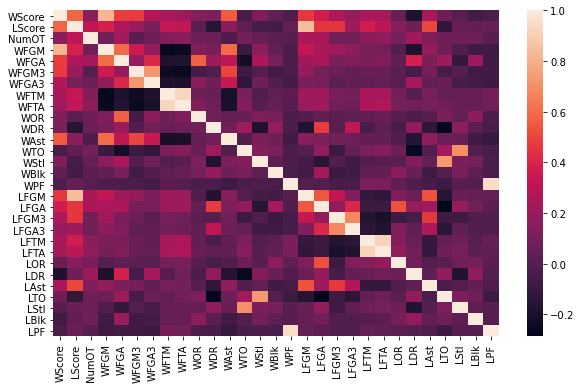

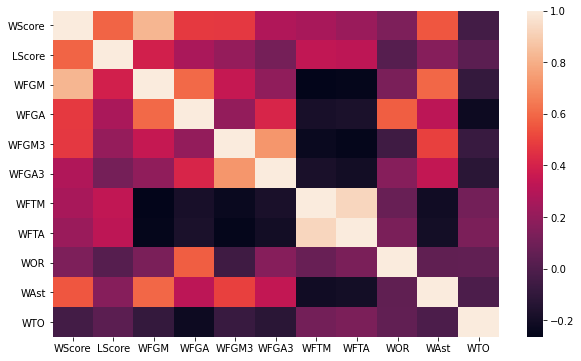

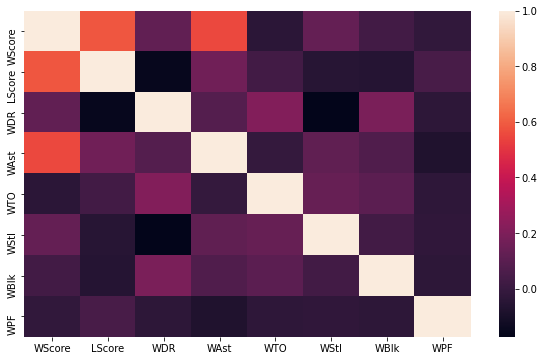

In [21]:
for df in [df_numeric, df_offense, df_defense]:
    
    plt.figure(figsize=(10,6))
    sns.heatmap(df.corr())

    plt.show()

# Linear Models

In [22]:
target = df_numeric['WScore']
features = df_numeric.drop('WScore', axis=1)

X = np.array(features)
y = np.array(target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Linear Regression
In-Sample R2:  1.0
Out-Sample R2:  1.0

In-Sample MSE:  3.0385571490131673e-28
Out-Sample MSE:  3.3874157926502053e-28

In-Sample MAE:  1.3038136646129724e-14
Out-Sample MAE:  1.3630255592596475e-14


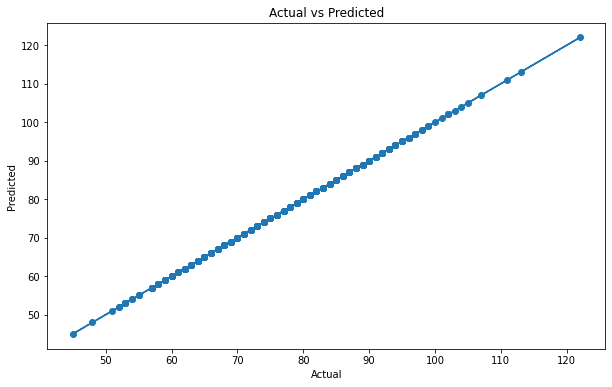

In [23]:
# train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

#metric report
print("Linear Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

Ridge Regression
In-Sample R2:  0.9999999975399188
Out-Sample R2:  0.9999999977662729

In-Sample MSE:  2.71981659306014e-07
Out-Sample MSE:  2.4678295091056206e-07

In-Sample MAE:  0.000411607965339225
Out-Sample MAE:  0.00039614898509485847


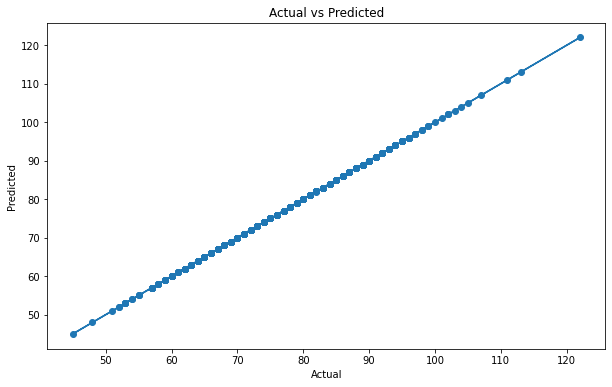

In [24]:
# train the model
ridge = Ridge()
ridge.fit(X_train, y_train)

#get predictions
in_sample_preds = ridge.predict(X_train)
out_sample_preds = ridge.predict(X_test)

#metric report
print("Ridge Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

Decision Tree
In-Sample R2:  1.0
Out-Sample R2:  0.9180914379423837

In-Sample MSE:  0.0
Out-Sample MSE:  9.04928664072633

In-Sample MAE:  0.0
Out-Sample MAE:  2.014267185473411


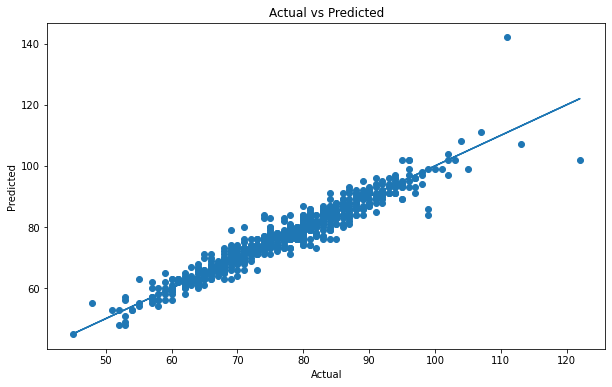

In [25]:
# train the model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

#metric report
print("Decision Tree")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

Random Forest
In-Sample R2:  0.996159416239833
Out-Sample R2:  0.9792991870076537

In-Sample MSE:  0.4246072632944227
Out-Sample MSE:  2.287033073929962

In-Sample MAE:  0.4273281452658884
Out-Sample MAE:  1.0740985732814528


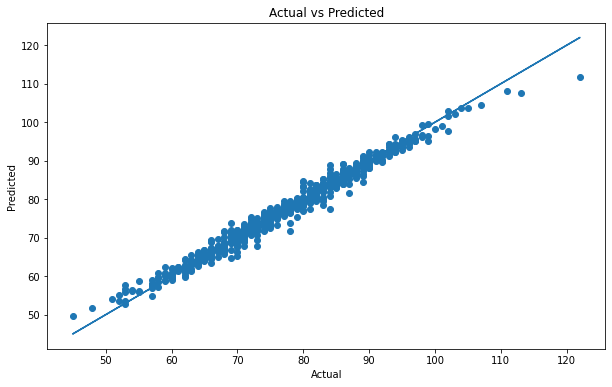

In [26]:
# train the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

#metric report
print("Random Forest")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

ElasticNet Regression
In-Sample R2:  0.9963809567390679
Out-Sample R2:  0.9963753440652144

In-Sample MSE:  0.40011418855285447
Out-Sample MSE:  0.40045325792450465

In-Sample MAE:  0.48648582965874443
Out-Sample MAE:  0.48839142213602793


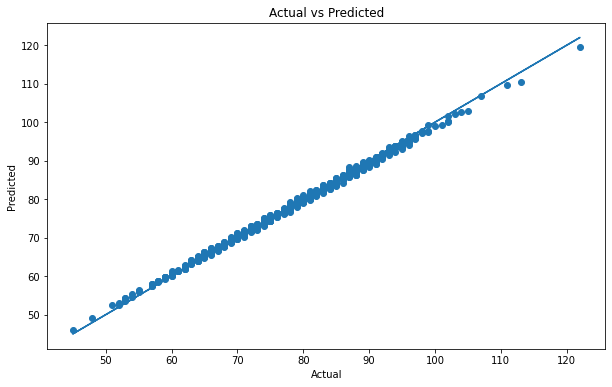

In [27]:
# train the model
en = ElasticNet()
en.fit(X_train, y_train)

#get predictions
in_sample_preds = en.predict(X_train)
out_sample_preds = en.predict(X_test)

#metric report
print("ElasticNet Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

Lasso Regression
In-Sample R2:  0.9979459573734412
Out-Sample R2:  0.9979821864863219

In-Sample MSE:  0.2270908468131662
Out-Sample MSE:  0.22292874412762564

In-Sample MAE:  0.3689006468274854
Out-Sample MAE:  0.368697266455786


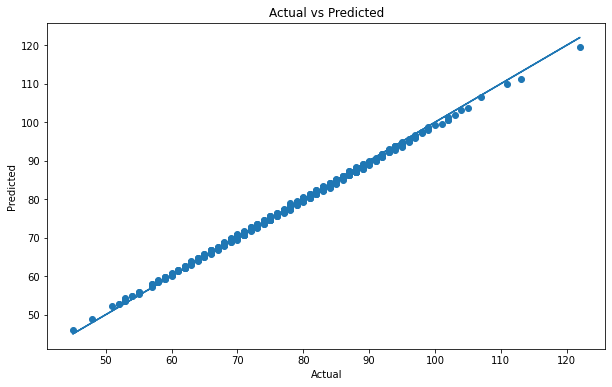

In [28]:
# train the model
lasso = Lasso()
lasso.fit(X_train, y_train)

#get predictions
in_sample_preds = lasso.predict(X_train)
out_sample_preds = lasso.predict(X_test)

#metric report
print("Lasso Regression")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

AdaBoost Regressor
In-Sample R2:  0.9198973589523793
Out-Sample R2:  0.9207138291880007

In-Sample MSE:  8.855987871074724
Out-Sample MSE:  8.759563936901696

In-Sample MAE:  2.3194791757917
Out-Sample MAE:  2.3174412545645144


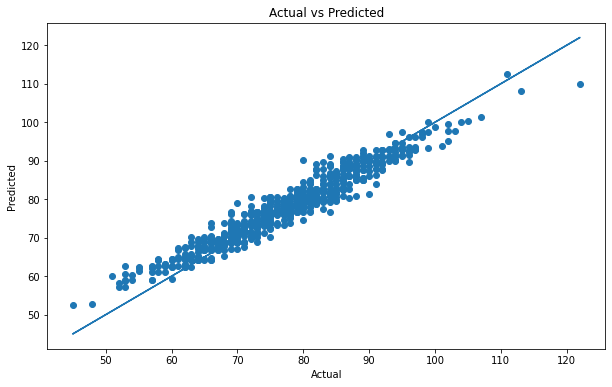

In [29]:
# train the model
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

#metric report
print("AdaBoost Regressor")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

GradientBoost Regressor
In-Sample R2:  0.9936718595885767
Out-Sample R2:  0.9905008038790606

In-Sample MSE:  0.699626554094583
Out-Sample MSE:  1.0494745164051291

In-Sample MAE:  0.6341121644405241
Out-Sample MAE:  0.7534100229979757


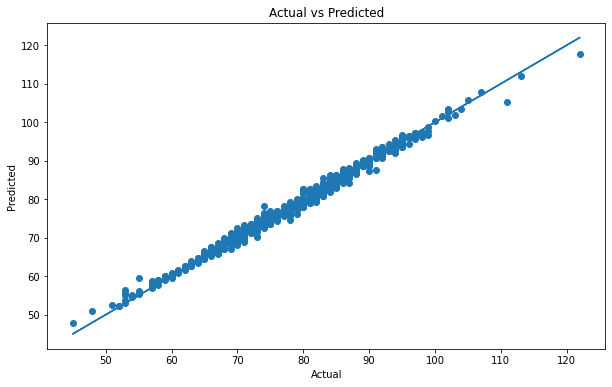

In [30]:
# train the model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

#metric report
print("GradientBoost Regressor")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

KNN Regressor
In-Sample R2:  0.838171579147422
Out-Sample R2:  0.771572669570401

In-Sample MSE:  17.891426718547343
Out-Sample MSE:  25.23673151750973

In-Sample MAE:  3.21147859922179
Out-Sample MAE:  3.953307392996109


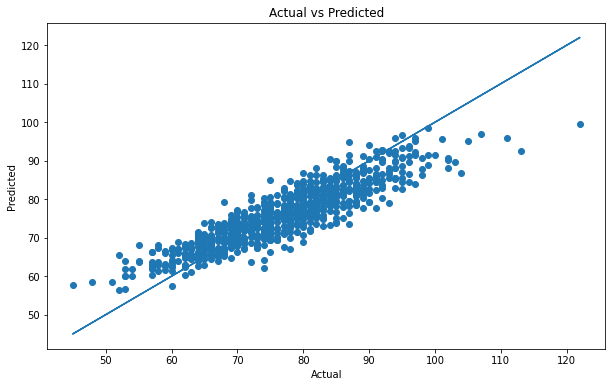

In [31]:
# train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#get predictions
in_sample_preds = knn.predict(X_train)
out_sample_preds = knn.predict(X_test)

#metric report
print("KNN Regressor")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

SVM Regressor
In-Sample R2:  0.9484217946143433
Out-Sample R2:  0.9514850038219399

In-Sample MSE:  5.702383283912279
Out-Sample MSE:  5.3599537796816294

In-Sample MAE:  1.7447825107891257
Out-Sample MAE:  1.7595097679015002


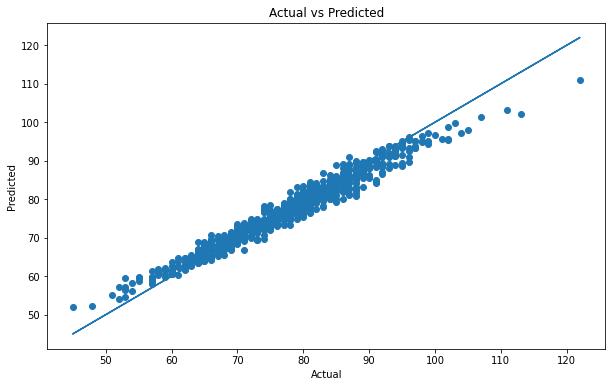

In [32]:
# train the model
svm = SVR()
svm.fit(X_train, y_train)

#get predictions
in_sample_preds = svm.predict(X_train)
out_sample_preds = svm.predict(X_test)

#metric report
print("SVM Regressor")
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)
plt.plot(y_test, y_test)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

# Model Selection

AdaBoost Regressor
In-Sample R2:  0.9186614299365026

In-Sample MSE:  8.992930178175943

In-Sample MAE:  2.366334182575353


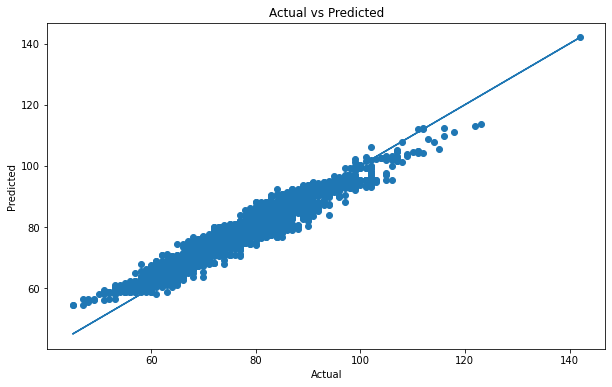

In [33]:
# train the model
ada = AdaBoostRegressor()
ada.fit(X, y)

#get predictions
in_sample_preds = ada.predict(X)

#metric report
print("AdaBoost Regressor")
print("In-Sample R2: ", r2_score(y, in_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y, in_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y, in_sample_preds))

# predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y, in_sample_preds)
plt.plot(y, y)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [34]:
pd.DataFrame(list(zip(features.columns, gb.feature_importances_))).sort_values(by=1, ascending=False).head(10)

,0,1
2,WFGM,0.644299
6,WFTM,0.170957
0,LScore,0.111660
4,WFGM3,0.070035
5,WFGA3,0.001183
10,WAst,0.000928
7,WFTA,0.000626
24,LTO,0.000071
11,WTO,0.000065
20,LFTA,0.000057


In [35]:
test_df = df_2021
test_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WinningTeam,LosingTeam,WTGP
0,2021,23,1101,70,1190,47,N,0,20,49,...,11,27,5,22,6,2,0,Abilene Chr,ETSU,23
1,2021,23,1104,81,1240,57,H,0,30,77,...,18,28,10,20,5,2,0,Alabama,Jacksonville St,30
2,2021,23,1111,81,1354,61,A,0,32,62,...,12,18,12,9,13,0,14,Appalachian St,S Carolina St,24
3,2021,23,1113,94,1348,88,N,0,27,61,...,7,26,14,16,8,2,0,Arizona St,Rhode Island,25
4,2021,23,1114,71,1341,66,N,0,22,51,...,7,15,14,24,12,1,0,Ark Little Rock,Prairie View,25


In [36]:
len(test_df)

3855

In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       3855 non-null   int64 
 1   DayNum       3855 non-null   int64 
 2   WTeamID      3855 non-null   int64 
 3   WScore       3855 non-null   int64 
 4   LTeamID      3855 non-null   int64 
 5   LScore       3855 non-null   int64 
 6   WLoc         3855 non-null   object
 7   NumOT        3855 non-null   int64 
 8   WFGM         3855 non-null   int64 
 9   WFGA         3855 non-null   int64 
 10  WFGM3        3855 non-null   int64 
 11  WFGA3        3855 non-null   int64 
 12  WFTM         3855 non-null   int64 
 13  WFTA         3855 non-null   int64 
 14  WOR          3855 non-null   int64 
 15  WDR          3855 non-null   int64 
 16  WAst         3855 non-null   int64 
 17  WTO          3855 non-null   int64 
 18  WStl         3855 non-null   int64 
 19  WBlk         3855 non-null 

In [38]:
# Drop null columns
test_df2 = test_df.dropna(axis=1, how="any")
test_df2 = test_df2.drop(["LFGM3", "LFGA3"], axis=1)
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       3855 non-null   int64 
 1   DayNum       3855 non-null   int64 
 2   WTeamID      3855 non-null   int64 
 3   WScore       3855 non-null   int64 
 4   LTeamID      3855 non-null   int64 
 5   LScore       3855 non-null   int64 
 6   WLoc         3855 non-null   object
 7   NumOT        3855 non-null   int64 
 8   WFGM         3855 non-null   int64 
 9   WFGA         3855 non-null   int64 
 10  WFGM3        3855 non-null   int64 
 11  WFGA3        3855 non-null   int64 
 12  WFTM         3855 non-null   int64 
 13  WFTA         3855 non-null   int64 
 14  WOR          3855 non-null   int64 
 15  WDR          3855 non-null   int64 
 16  WAst         3855 non-null   int64 
 17  WTO          3855 non-null   int64 
 18  WStl         3855 non-null   int64 
 19  WBlk         3855 non-null 

In [39]:
len(test_df2)

3855

In [40]:
test_df2.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WinningTeam,LosingTeam,WTGP
0,2021,23,1101,70,1190,47,N,0,20,49,...,11,27,5,22,6,2,0,Abilene Chr,ETSU,23
1,2021,23,1104,81,1240,57,H,0,30,77,...,18,28,10,20,5,2,0,Alabama,Jacksonville St,30
2,2021,23,1111,81,1354,61,A,0,32,62,...,12,18,12,9,13,0,14,Appalachian St,S Carolina St,24
3,2021,23,1113,94,1348,88,N,0,27,61,...,7,26,14,16,8,2,0,Arizona St,Rhode Island,25
4,2021,23,1114,71,1341,66,N,0,22,51,...,7,15,14,24,12,1,0,Ark Little Rock,Prairie View,25
